Classic SVM Accuracy: 0.7778
Classic SVM Time: 0.0030 seconds
Quantum SVM Accuracy: 0.5778
Quantum SVM Time: 58.2796 seconds


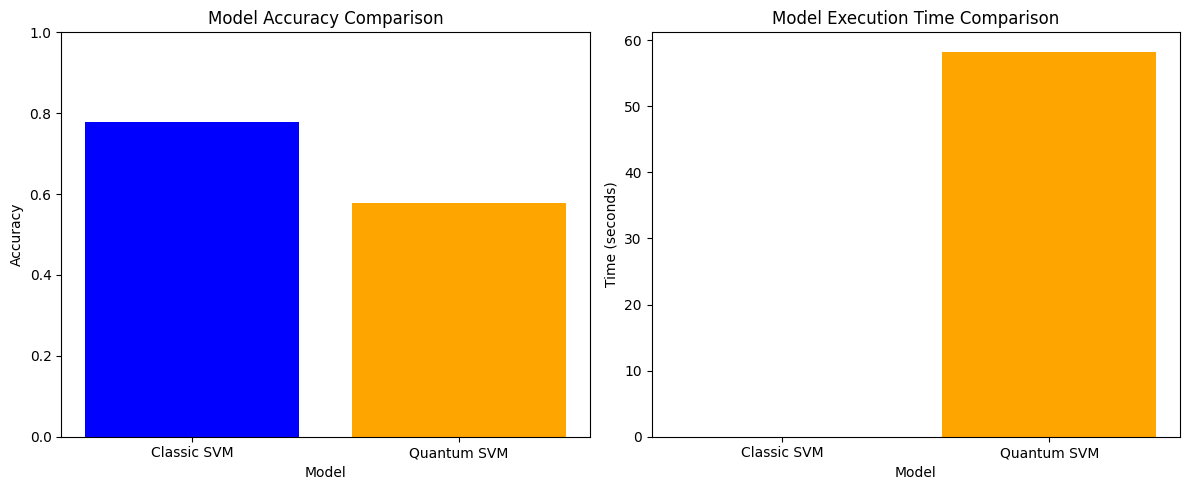

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import pennylane as qml
from pennylane import numpy as pnp

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Discretize the features into binary values
discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
X_train_binned = discretizer.fit_transform(X_train_scaled)  # No need for toarray()
X_test_binned = discretizer.transform(X_test_scaled)  # No need for toarray()

# Define quantum device with 4 wires (one for each feature)
dev = qml.device('default.qubit', wires=4)

# Quantum SVM model
@qml.qnode(dev)
def quantum_svm(params, x):
    # Prepare the state based on the input features
    qml.BasisState(np.round(x).astype(int), wires=range(4))  # Ensure x is binary for basis state
    for i in range(len(params)):
        qml.Rot(*params[i], wires=i)  # Apply rotation gates
    return qml.expval(qml.PauliZ(0))  # Measure the first qubit

# Train the quantum SVM
def train_quantum_svm(X, y, epochs=100):
    num_params = 4  # One parameter set for each feature
    params = pnp.random.rand(num_params, 3) * np.pi  # Initialize parameters
    for epoch in range(epochs):
        for i in range(len(X)):
            # Forward pass
            prediction = quantum_svm(params, X[i])
            # Update parameters (simple gradient descent)
            params -= 0.1 * (prediction - y[i]) * np.array([[1, 1, 1]] * num_params)
    return params

# Measure classic SVM performance
start_time = time.time()
classic_svm = SVC(kernel='linear')
classic_svm.fit(X_train_binned, y_train)
classic_preds = classic_svm.predict(X_test_binned)
classic_accuracy = accuracy_score(y_test, classic_preds)
classic_time = time.time() - start_time

# Measure quantum SVM performance
start_time = time.time()
quantum_params = train_quantum_svm(X_train_binned, y_train)
quantum_time = time.time() - start_time

# Make predictions on the test set
quantum_preds = np.array([quantum_svm(quantum_params, x) for x in X_test_binned])
quantum_preds = np.where(quantum_preds > 0, 1, 0)  # Convert predictions to binary

# Calculate accuracy for quantum SVM
quantum_accuracy = accuracy_score(y_test, quantum_preds)

# Print results
print(f"Classic SVM Accuracy: {classic_accuracy:.4f}")
print(f"Classic SVM Time: {classic_time:.4f} seconds")
print(f"Quantum SVM Accuracy: {quantum_accuracy:.4f}")
print(f"Quantum SVM Time: {quantum_time:.4f} seconds")

# Visualization
labels = ['Classic SVM', 'Quantum SVM']
accuracies = [classic_accuracy, quantum_accuracy]
times = [classic_time, quantum_time]

# Create subplots for accuracy and time
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy Bar Chart
ax[0].bar(labels, accuracies, color=['blue', 'orange'])
ax[0].set_ylim(0, 1)
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Model')

# Time Bar Chart
ax[1].bar(labels, times, color=['blue', 'orange'])
ax[1].set_title('Model Execution Time Comparison')
ax[1].set_ylabel('Time (seconds)')
ax[1].set_xlabel('Model')

# Show the plots
plt.tight_layout()
plt.show()


Classic SVM Accuracy: 0.7333
Classic SVM Time: 0.0033 seconds
Quantum SVM Accuracy: 0.2667
Quantum SVM Time: 25.7181 seconds


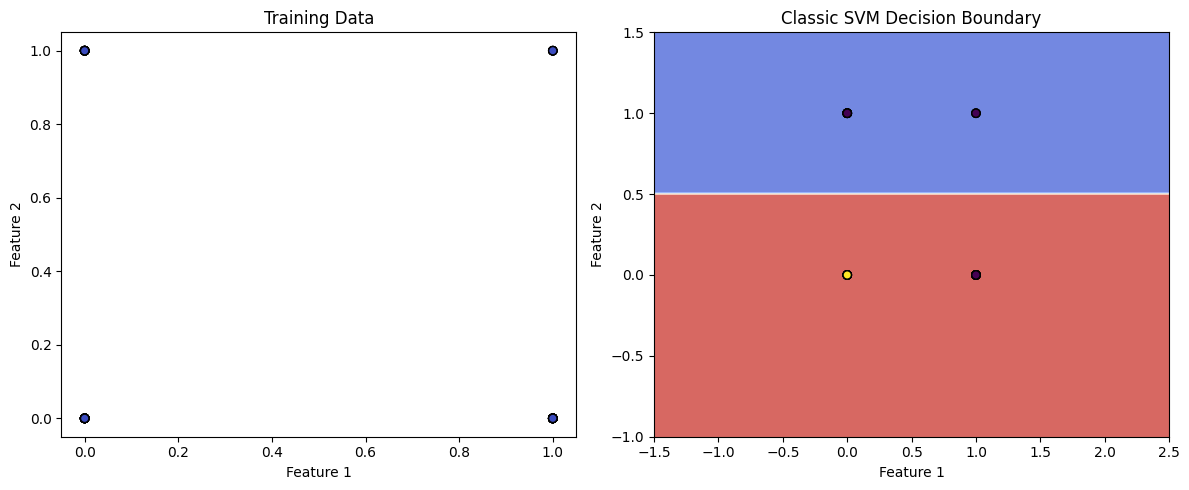

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
import pennylane as qml
from pennylane import numpy as pnp

# Create a synthetic dataset (non-linear)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Normalize and binarize the dataset
X = (X - X.min()) / (X.max() - X.min())  # Normalize to [0, 1]
X = np.round(X)  # Convert to binary (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define quantum device with 2 wires (for 2 features)
dev = qml.device('default.qubit', wires=2)

# Quantum SVM model
@qml.qnode(dev)
def quantum_svm(params, x):
    # Prepare the state based on the input features
    qml.BasisState(np.round(x).astype(int), wires=range(2))  # Ensure x is binary for basis state
    for i in range(len(params)):
        qml.Rot(*params[i], wires=i)  # Apply rotation gates
    return qml.expval(qml.PauliZ(0))  # Measure the first qubit

# Train the quantum SVM
def train_quantum_svm(X, y, epochs=100):
    num_params = 2  # One parameter set for each feature
    params = pnp.random.rand(num_params, 3) * np.pi  # Initialize parameters
    for epoch in range(epochs):
        for i in range(len(X)):
            # Forward pass
            prediction = quantum_svm(params, X[i])
            # Update parameters (simple gradient descent)
            params -= 0.1 * (prediction - y[i]) * np.array([[1, 1, 1]] * num_params)
    return params

# Measure classic SVM performance
start_time = time.time()
classic_svm = SVC(kernel='rbf')  # Using RBF kernel for non-linear data
classic_svm.fit(X_train, y_train)
classic_preds = classic_svm.predict(X_test)
classic_accuracy = accuracy_score(y_test, classic_preds)
classic_time = time.time() - start_time

# Measure quantum SVM performance
start_time = time.time()
quantum_params = train_quantum_svm(X_train, y_train)
quantum_preds = np.array([quantum_svm(quantum_params, x) for x in X_test])
quantum_preds = np.where(quantum_preds > 0, 1, 0)  # Convert predictions to binary
quantum_accuracy = accuracy_score(y_test, quantum_preds)
quantum_time = time.time() - start_time

# Print results
print(f"Classic SVM Accuracy: {classic_accuracy:.4f}")
print(f"Classic SVM Time: {classic_time:.4f} seconds")
print(f"Quantum SVM Accuracy: {quantum_accuracy:.4f}")
print(f"Quantum SVM Time: {quantum_time:.4f} seconds")

# Visualization of the dataset and decision boundaries
plt.figure(figsize=(12, 5))

# Plotting the dataset
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotting decision boundaries for classic SVM
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1, 1.5, 100))
Z = classic_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
plt.title('Classic SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
